# Tarea 2 - Fernando Briseño

## Parte 1

(1) ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?

<span style="color:red">Una matriz equivale a una transformación lineal entre espacios vectoriales porque comprende una serie de transformaciones lineales (suma y multiplicación por escalar) aplicadas sobre un vector del dominio y los transforma en un vector en el span de la transformación lineal.</span>

(2) ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?

<span style="color:red">1. Una transformación lineal de una matriz diagonal resulta en la multiplicación de cada columna de la matriz que representa la transformación lineal por el elemento en la misma columna de la matriz diagonal. </span>

<span style="color:red">2. Una transformación lineal de una matriz ortogonal resulta en una reflexión y rotación de esa transformación lineal. </span>

(3) ¿Qué es la descomposición en valores singulares de una matriz?

<span style="color:red">Es la factorización de una matriz $A_{mxn}$ en tres componentes: una matriz cuadrada ortogonal $U_{mxm}$, una matriz diagonal rectangular $\Sigma_{mxn}$ con números reales no negativos en la diagional y una matriz cuadrada ortogonal $V_{nxn}^T$. Todo esto de tal forma que $A=U\Sigma V^T$</span>

(4) ¿Qué es diagonalizar una matriz y que representan los eigenvectores?

<span style="color:red">La diagonalización de una matriz es hallar para una matriz $A_{nxn}$ una matriz P invertible tal que $P^{-1}AP$ resulta en una matriz diagonal. De esta matriz $P$, los eigenvectores son los vectores columna de esa matriz, que se multiplican por los eigenvalores que son los valores en la matriz diagonal. </span>

(5) ¿<u>Intuitivamente</u> qué son los eigenvectores?

<span style="color:red">Son la dirección en la que apunta una transformación lineal de un vector, mientras que la magnitud final de esta transformación está dada por la multiplicación por el eigenvalor.</span>

(6) ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones    lineales simples?

<span style="color:red">La descomposición en valores singulares convierten una transformación lineal representada por una matriz A sobre un vector X en tres operaciones, primero una rotación, luego un reescalamiento sobre las ejes de las coordenadas y después una rotación de nuevo.</span>

(7) ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?

<span style="color:red">La diagonalización es un caso especial de la descomposición en valores singulares, pues está limitada a matrices cuadradas, y forza a que sea la misma matriz que premultiplica y postmultiplica a la diagonializada. </span>

(8) ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor a una matriz?

<span style="color:red">Cuando se desea reducir el rango de una matriz porque se requiere comprimirla o para eliminar el ruido (información innecesaria), se utiliza el método SVD, de tal forma que se obtiene la forma $A_{mxn}=U_{mxm}\Sigma_{mxn} V_{nxn}^T$  </span>

<span style="color:red">Entonces se define un rango menor, $k$, de tal forma que se puede reescribir una aproximación de $A$ con la forma $A_{mxn}=U_{mxk}\Sigma_{kxk} V_{kxn}^T$ eliminando columnas de $U$ y filas de $V$ y elementos de $\Sigma$ para llegar al rango $k$, ocupando estos tres elementos mucho menos espacio que la matriz original A. </span>

(9) Describe el método de minimización por descenso gradiente

<span style="color:red">El método de minimización por descenso gradiente se aplica cuando se desea minimizar una f(x) sin restricciones.</span>

<span style="color:red">i. En general, se empieza determinando un vector $x_0$ inicial.</span>

<span style="color:red">ii. De forma iterativa, se toma ese valor junto con el gradiente de la función a minimizar y un valor $\alpha$, de tal forma que se repite la siguiente ecuación:</span>

<span style="color:red"> $x_k=x_{k-1}-\alpha\nabla f_{(x_{k-1})}$

<span style="color:red"> iii. Se repite hasta que converge, lo que significa que mayores iteraciones no resultan en una mayor minimización de la función. </span>

(10) Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos

<span style="color:red">+ (Con restricciones) Programación lineal para determinar rutas óptimas (cabe dentro de ciencia de datos investigación de operaciones?) 

<span style="color:red">+ (Con restricciones) Problemas de clasificación de observaciones (clusters)

<span style="color:red">+ (Sin restricciones) Mínimos cuadrados ordinarios

<span style="color:red">+ (Sin restricciones) Máxima verosimilitud para estimación de logit

## Parte 2

### Primer ejercicio

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

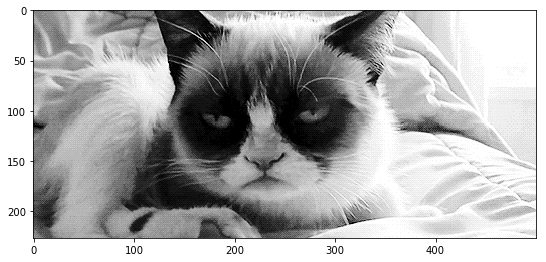

In [75]:
img = Image.open('grumpy-cat.png')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

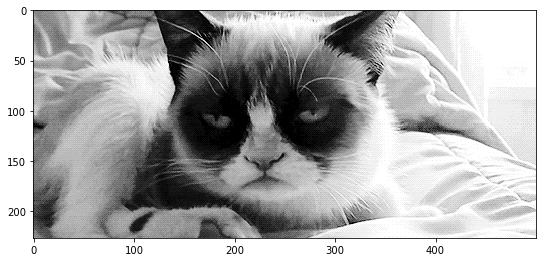

In [76]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [77]:
U, sigma, V = np.linalg.svd(imgmat)
[U.shape, sigma.shape, V.shape]

[(227, 227), (227,), (500, 500)]

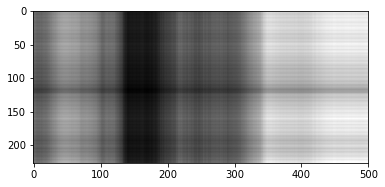

In [78]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

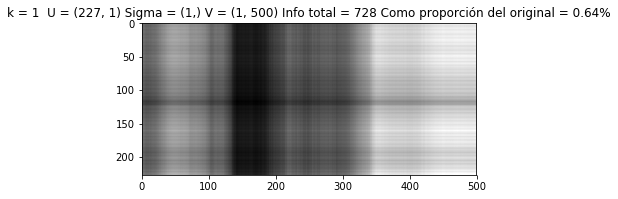

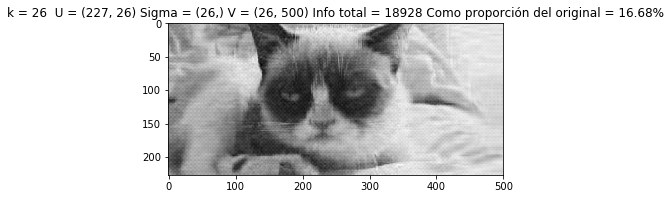

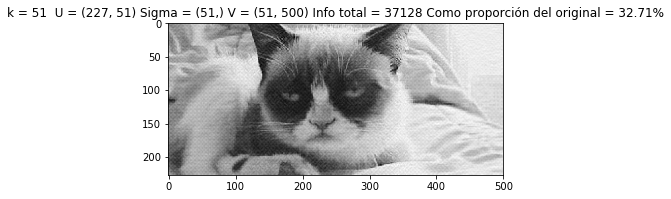

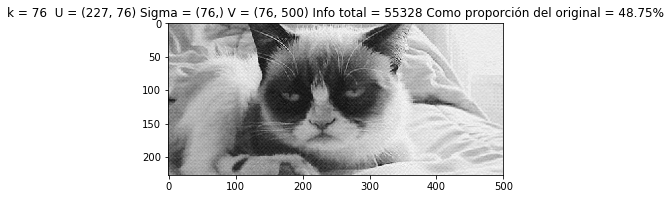

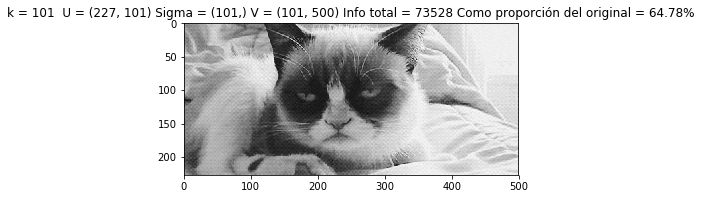

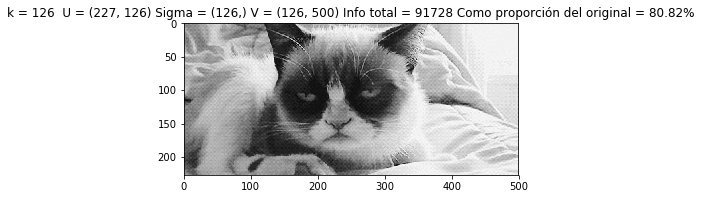

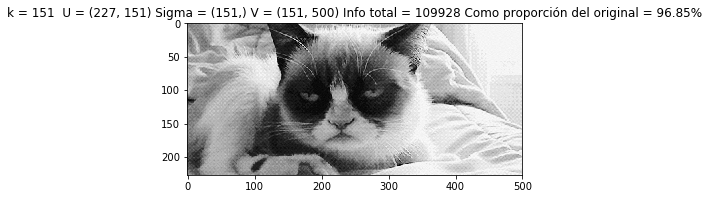

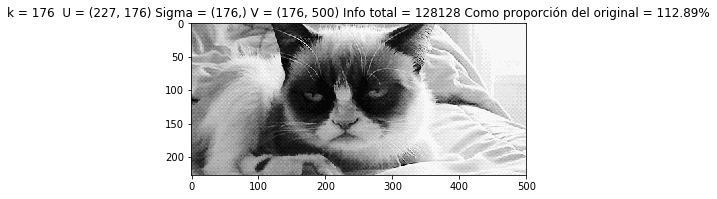

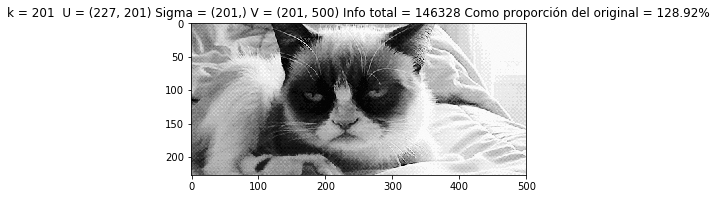

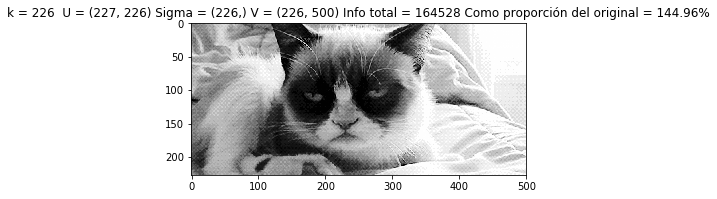

In [79]:
for i in range(1, 227, 25):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    a = U[:, :i].shape
    b = sigma[:i].shape
    c = V[:i, :].shape
    d = U[:, :i].shape[0]*U[:, :i].shape[1]+sigma[:i].shape[0]+V[:i, :].shape[0]*V[:i, :].shape[1]
    e = d*100 / (113500)
    title = "k = %s  U = %s Sigma = %s V = %s Info total = %s Como proporción del original = %.2f%%" % (i,str(a),str(b),str(c),str(d), e)
    plt.title(title)
    plt.show()


### Segundo ejercicio

In [80]:
import numpy as np

Definamos la función inversaSVD de tal forma que se aplica la SVD y sustituye los elementos de la matriz $\Sigma$ por sus inversos

In [81]:
def inversaSVD(A):
    u, s, v = np.linalg.svd(A)
    Ainv = np.dot (v.transpose(), np.dot(np.diag(s**-1),u.transpose()))
    return(Ainv)

Comprobamos que funciona dentro de cierto nivel de tolerancia

In [82]:
from numpy.linalg import inv
temp = np.random.rand(1000,1000)
np.allclose(inversaSVD(temp) , inv(temp))

True

Ahora creemos una función que resuelva sistemas de ecuaciones, asumamos que son cuadradas de rango completo

In [83]:
def solver(A,b):
    Ainv = inversaSVD(A)
    x = np.dot(Ainv,b)
    return(x)

In [84]:
A = np.array([[1,5],[4,7]])
Ainv = inversaSVD(A)
b = np.array([[1],[.5]])
x = np.dot(Ainv,b)
x

array([[-0.34615385],
       [ 0.26923077]])

In [85]:
np.dot(A,x)

array([[ 1. ],
       [ 0.5]])

In [86]:
np.dot(A,solver(A,b))

array([[ 1. ],
       [ 0.5]])

Funciona

Ahora, juguemos con el sistema Ax=b donde A=[[1,1],[0,0]] y b puede tomar distintos valores.

In [87]:
B=np.array([[1,1],[0,0]])
b1=np.array([[3],[0]])
solver(B,b1)

/home/nevocus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ nan],
       [ nan]])

(a) Observar que pasa si b esta en la imagen de A (contestar cuál es la imagen) y si no está (ej. b = [1,1]). 

In [88]:
b2=np.array([[1],[1]])
solver(B,b2)

/home/nevocus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ nan],
       [ nan]])

In [89]:
b3=np.array([[5],[0]])
solver(B,b3)

/home/nevocus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ nan],
       [ nan]])

In [90]:
b4=np.array([[0],[0]])
solver(B,b4)

/home/nevocus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ nan],
       [ nan]])

(b) Contestar, ¿la solución resultante es única? Si hay más de una solución, investigar que carateriza a la solución devuelta. 

<span style="color:red"> No, pues al no ser una matriz de rango completo, no es invertible y no se puede efectuar la operación. Lo que sucede es que una dimensión está colapsando con esta transformación, y, por ello, las soluciones pueden ser infinitas o no existir (si el vector $b$ en $Ax =b$ está en dimensiones más allá del rango de la transformación $A$).

(c) Repetir cambiando A=[[1,1],[0,1e-32]], ¿En este caso la solucíon es única? ¿Cambia el valor devuelto de x en cada posible valor de b del punto anterior?

In [91]:
B=np.array([[1,1],[0,1e-32]])
b1=np.array([[3],[0]])
solver(B,b1)

array([[  3.00000000e+00],
       [ -1.66533454e-16]])

<span style="color:red"> Sí, la solución es única. Sí, puesto que, aunque sea muy pequeño el valor, ya existe una correspondencia entre el dominio y la imagen de la transformación $A$.

## Tercer ejercicio

<li>Deben programar un <emph>script</emph> que lea el archivo <a href="https://github.com/mauriciogtec/PropedeuticoDataScience2017/blob/master/Tarea/study_vs_sat.csv">study_vs_sat.csv</a> y lo almacene como un <emph>data frame</emph> de pandas.</li>

In [92]:
import pandas as pd

In [93]:
dataframe = pd.read_csv('study_vs_sat.csv')
dataframe

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


In [94]:
study_hours = np.array(pd.to_numeric(dataframe['study_hours'],downcast='float'))
sat_score = np.array(pd.to_numeric(dataframe['sat_score'],downcast='float'))


<li>Pleantear como un problema de optimización que intente hacer una aproximación de la forma <code>sat_score ~ alpha + beta*study_hours</code> minimizando la suma de los errores de predicción al cuadrado, <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">pueden consultar este link</a></li> 

<span style="color:red"> Se define el error de predicción como $e = sat\_score - \widehat{\alpha} - \widehat{\beta} study\_hours$, donde $[\widehat{\alpha} + \widehat{\beta} study\_hours]$ será resumido como $Xb$ donde X es una matriz con una columna de unos y study_hours $X = [ 1   study\_hours ]$ y $b$ es un vector que contiene a $[\widehat{\alpha}  \widehat{\beta}]$

<span style="color:red"> Entonces, la suma de los errores puede escribirse como $e'e$, que es una función cuadrática que depende de $b$  con la forma $e'e = sat\_score ' sat\_score + 2 sat\_score'Xb + b'X'Xb$

¿Cuál es el gradiente de la función que se quiere optimizar (hint: las variables que queremos optimizar son alpha y beta)?

<span style="color:red"> El gradiente es $-2X'sat\_score + 2X'Xb$, del que se puede optimizar para obtener $b$ estimada

<li>Programar una función que reciba valores de alpha, beta y el vector sat_score y devuelva un vector array de numpy de predicciones <code>alpha + beta*study_hours_i</code>, con un valor por cada individuo</li>

In [95]:
def predict(alpha, beta, vector):
    a = vector.shape[0]
    unos = np.ones(a)
    alfavector = alpha * unos 
    betaequis = beta * vector
    prediccion = alfavector + betaequis
    return (prediccion)

In [96]:
predict(1,2,study_hours)

array([  9.,  19.,  21.,  29.,   9.,  15.,  25.,  45.,   3.,   7.,  17.,
        23.,  11.,  13.,  21.,  23.,  33.,  27.,  27.,  21.])

<li>Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours. Observen que <code>X*[alpha,beta]</code> nos devuelve <code>alpha + beta*study_hours_i</code> en cada entrada y que entonces el problema se vuelve <code>sat_score ~ X*[alpha,beta]</code>

In [97]:
a = study_hours.shape[0]
X = np.ones((a,2))
X[:,1]= study_hours
X

array([[  1.,   4.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,  14.],
       [  1.,   4.],
       [  1.,   7.],
       [  1.,  12.],
       [  1.,  22.],
       [  1.,   1.],
       [  1.,   3.],
       [  1.,   8.],
       [  1.,  11.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,  10.],
       [  1.,  11.],
       [  1.,  16.],
       [  1.,  13.],
       [  1.,  13.],
       [  1.,  10.]])

<li>Calculen la pseudoinversa  X^+ de X y computen <code>(X^+)*sat_score</code> para obtener alpha y beta soluciones.</li> 

In [98]:
b_est= np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,sat_score))
b_est

array([ 353.1648795 ,   25.32646778])

<li>Comparen la solución anterior con la de la fórmula directa de solución exacta <code>(alpha,beta)=(X^t*X)^(-1)*X^t*study_hours</code>.</li>

In [99]:
b_est2 =np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,sat_score))
b_est2

array([ 353.1648795 ,   25.32646778])

Ahora usaremos esto para predecir los valores usando la función que habíamos programado antes

In [100]:
predict(b_est[0],b_est[1],study_hours)

array([ 454.47074956,  581.1030814 ,  606.42955845,  707.73543614,
        454.47074956,  530.45015782,  657.08248204,  910.34719151,
        378.49134701,  429.14428013,  555.77661961,  631.7560355 ,
        479.79721898,  505.12368077,  606.42955845,  631.7560355 ,
        758.38835972,  682.40895909,  682.40895909,  606.42955845])

<li><strong>(Avanzado)</strong> Usen la libreria <code>matplotlib</code> par visualizar las predicciones  con alpha y beta solución contra los valores reales de sat_score.</li>

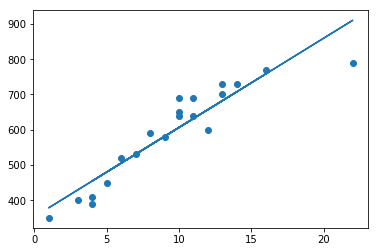

In [101]:
import matplotlib.pyplot as plt
plt.scatter(study_hours, sat_score)
plt.plot(study_hours, study_hours*b_est[1] + b_est[0])
plt.show()


<li><strong>(Muy avanzado)</strong> Programen el método de descenso gradiente para obtener alpha y beta por vía de un método numérico de optimización. Experimenten con distintos learning rates (tamaños de paso). </li>

In [102]:
import random
from sklearn import preprocessing

In [103]:
def gradientDescent(x, y, b_inicial, numiter, step):
        b = b_inicial
        contador = 0
        
        for i in range(0, numiter):
        
            error = np.dot(x, b)- y
            error_2 = np.dot(error.T,error)
        
            tamano = b_est.shape[0]
            step_direction = np.array([random.uniform(-1, 1) for i in range(tamano)])
            b_prueba = b - np.dot(step,step_direction)
        
            error_prueba = np.dot(x, b_prueba)- y
            error_2_prueba = np.dot(error_prueba.T,error_prueba)
        
            if error_2_prueba < error_2:
                b = b_prueba
                desciende = "Sí"
                contador = contador + 1
            else:
                desciende = "No"
            
            
            # print("Iteracion %d | Error: %f | Desciende: %s" % (i, error_2_prueba,desciende))
        
            #Update
            if error_2_prueba < error_2:
                b = b_prueba
        print("Descendió en", str(contador), "ocasiones de ", str(numiter), "iteraciones")
        print("El error cuadrático es de", str(error_2))
        return b

In [104]:
b_inicial = np.array([0,0])
gradientDescent(X, sat_score, b_inicial, 10000, .25)

Descendió en 3222 ocasiones de  10000 iteraciones
El error cuadrático es de 44493.560099


array([ 353.18534126,   25.32364597])

Comparémoslo con el error cuadrático obtenido anteriormente

In [105]:
error = np.dot(X, b_est)- sat_score
error_2 = np.dot(error.T,error)
error_2

44493.555579148531

Con esto concluimos.